# Исследование объявлений о продаже квартир


В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Описание данных:
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Портфолио/Недвижимость/real_estate_data.csv',delimiter='\t')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


Вывод на основе описательных данных:

1. last_price: минимальная цена квартиры 12190 руб., что явно не характерно для рынка СПб и ЛО. Похоже на ошибку. Максимальная цена 763 000 000 руб. очень большая, но для исторических/элитных объектов возможна. Такие значения могут плохо влиять на среднее значение, вероятно, большие данные тоже стоит исключить.

2. rooms: минимальное число комнат 0 - ошибка. Как вариант это может быть квартира-студия. Нужно проверить.

3. ceiling_height: минимальная высота потолков 1 метр, максимальная - 100 метров. Такие значения будем удалять.

4. floors_total: max количество этажей 60 похоже на ошибку, самое высокое здание в Санкт-Петербурге и окретностях - 35 этажей. Такие объекты следует удалить.

5. living_area: min жилая площадь 2 м² невозможно. Такие объекты следует удалить.

6. kitchen_area: min площадь кухни 1,3 м² невозможно. Такие объекты следует удалить.

7. airports_nearest: min расстояние до аэропорта 0 м невозможно. Два варианта событий: либо нет данных и заполнили нулем, либо ошибка. Такие объекты следует удалить.

8. days_exposition: минимальное количество дней размещения объявления - 1. Продажа недвижимости за 1 день или снятие объявления по другой причине - допустимый вариант, но, если таких объявлений много, то такие данные могут негативно влиять на среднее. Максимальное значение - 1580 дней (больше 4-х лет) также может негативно влиять на среднее время.

In [ ]:
# узнаем длину датасета
len(df)

23699

In [ ]:
# проверим дубликаты и выведем их сумму
df.duplicated().sum()

0

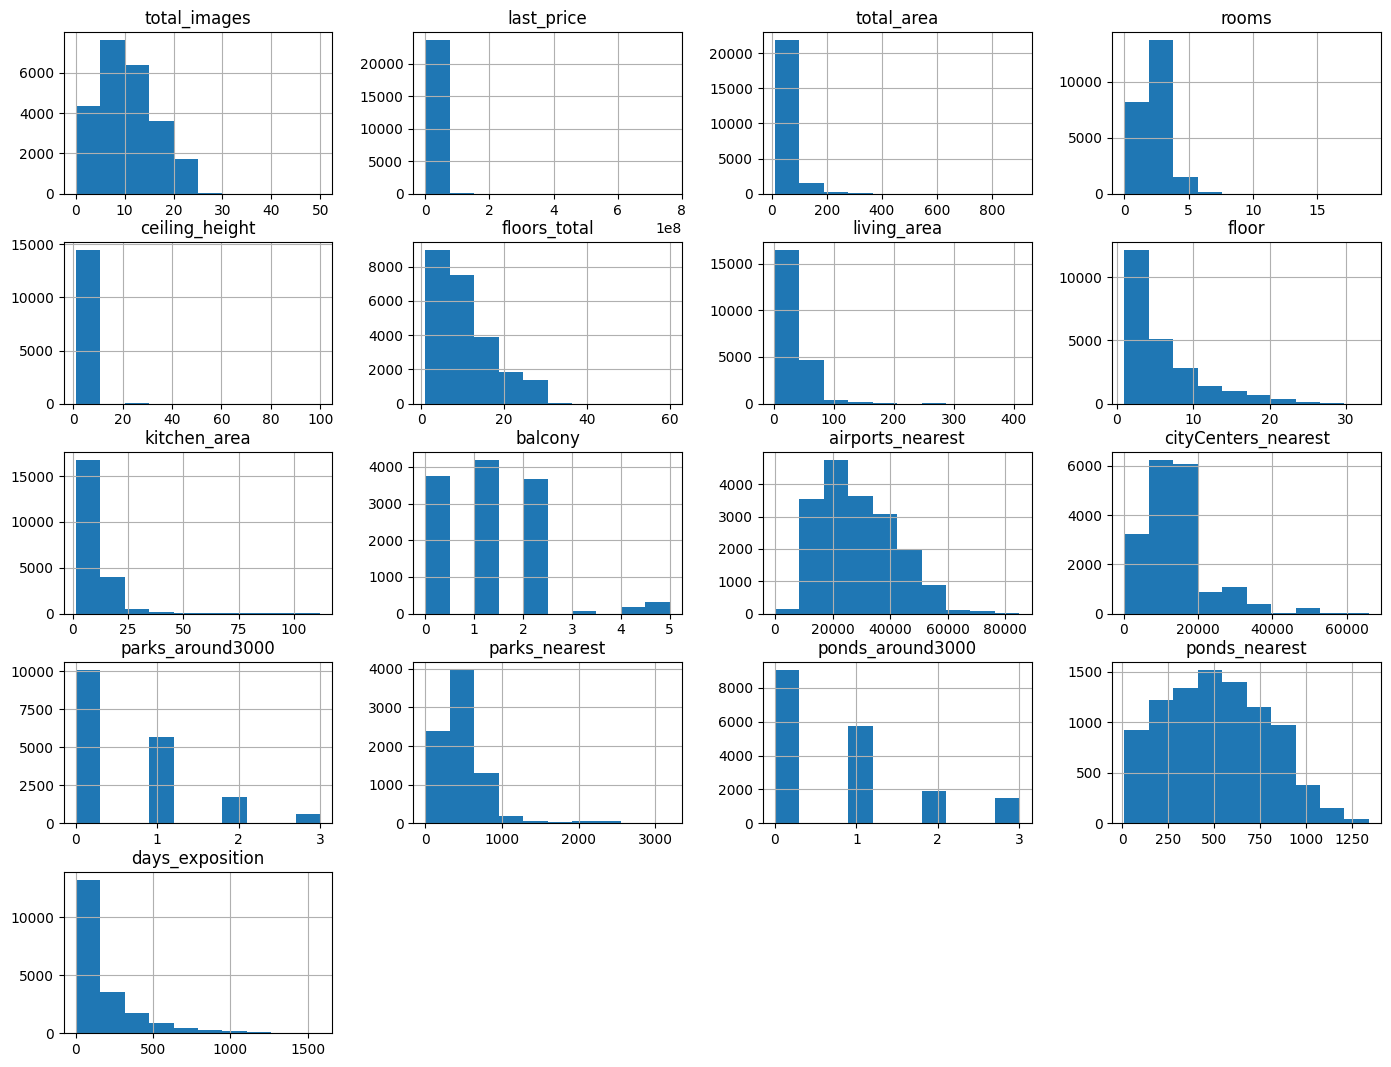

In [ ]:
p = df.hist(figsize = (17,13))


In [ ]:
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В 14 столбцах из 22 присутствуют пропуски:

In [ ]:
# заменяем пропуски в 'is_apartment' на False так как пользователи если помещение является жилым просто не указывали это
df['is_apartment'].fillna(False, inplace=True)

df['is_apartment'].isna().sum()

0

In [ ]:
# тоже самое сделаем и с балконами
df['balcony'].fillna(0, inplace=True)
# проверка
df['balcony'].isna().sum()

0

In [ ]:
# Заполняем пропуски по высоте потолков медианным значением относительно населенных пунктов
for locality in df['locality_name'].unique():
    median_value = df.loc[df['locality_name'] == locality, 'ceiling_height'].median()
    df.loc[(df['ceiling_height'].isna()) & (df['locality_name'] == locality), 'ceiling_height'].median()

df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median()
df['ceiling_height'].isna().sum()

0

In [ ]:
# повторим данный алгоритм для удаленности от центра
for locality in df['locality_name'].unique():
    median_value = df.loc[df['locality_name'] == locality, 'cityCenters_nearest'].median()
    df.loc[(df['cityCenters_nearest'].isna()) & (df['locality_name'] == locality), 'cityCenters_nearest'].median()

df.loc[df['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = df['cityCenters_nearest'].median()
df['cityCenters_nearest'].isna().sum()

0

In [ ]:
df['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [ ]:
df['ceiling_height'].unique()

array([  2.7 ,   2.65,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   3.2 ,   2.61,   3.25,
         3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,   3.3 ,
         2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,   3.4 ,
         3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,   2.58,
         3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,   2.45,
         3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,   3.16,
         3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,   5.  ,
         2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,   2.83,
         4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,   3.18,
         3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,   2.63,
         3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,   3.66,
         3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,   3.36,
        32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,   3.26,
      

In [ ]:
df['is_apartment'].unique()

array([False,  True])

In [ ]:
df.sample(7)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21153,6,2950000.0,35.6,2018-08-03T00:00:00,1,2.65,10.0,18.2,4,False,False,False,8.0,1.0,Колпино,NaN,13098.5,NaN,NaN,NaN,NaN,139.0
10441,5,2650000.0,32.9,2018-11-06T00:00:00,1,2.50,7.0,18.8,2,False,False,False,5.5,1.0,Петергоф,46149.0,49574.0,1.0,722.0,0.0,NaN,37.0
22372,4,2990000.0,26.0,2017-11-10T00:00:00,1,2.40,6.0,16.2,2,False,False,False,5.0,0.0,Санкт-Петербург,13185.0,9466.0,0.0,NaN,0.0,NaN,74.0
21705,13,8300000.0,93.0,2018-12-09T00:00:00,3,2.70,16.0,45.0,16,False,False,False,15.0,0.0,Санкт-Петербург,32775.0,13874.0,0.0,NaN,1.0,1015.0,NaN
21585,6,2500000.0,51.5,2018-06-13T00:00:00,2,2.50,5.0,30.0,3,False,False,False,10.0,2.0,поселок Романовка,NaN,13098.5,NaN,NaN,NaN,NaN,313.0
571,0,4600000.0,51.0,2018-01-17T00:00:00,2,2.65,16.0,29.0,7,False,False,False,10.2,1.0,Санкт-Петербург,13770.0,11764.0,0.0,NaN,0.0,NaN,189.0
14856,20,4500000.0,46.1,2015-05-17T00:00:00,2,2.65,9.0,28.6,9,False,False,False,6.7,2.0,Санкт-Петербург,27960.0,12483.0,1.0,526.0,1.0,441.0,994.0


In [ ]:
# преобразуем столбцы 'last_price', 'balcony' к типу данных int
df[['last_price', 'balcony']] = df[['last_price', 'balcony']].apply(lambda x: x.astype('int64'))
# проверяем
df[['last_price', 'balcony']].dtypes

last_price    int64
balcony       int64
dtype: object

In [ ]:
# преобразуем first_day_exposition к типу datetime с помощью pd.to_datetime
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# проверяем
df.dtypes

total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                   float64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000               float64
parks_nearest                  float64
ponds_around3000               float64
ponds_nearest                  float64
days_exposition                float64
dtype: object

In [ ]:
# преобразуем к булевому типу
df['is_apartment'] = df['is_apartment'].astype('boolean')
# проверка
df['is_apartment'].dtypes

BooleanDtype

In [ ]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Видим дублирующие значения в посЕлок и посЁлок

In [ ]:
# заменяем поселок на посёлок через replace
df['locality_name'] = df['locality_name'].str.replace('поселок','посёлок')

In [ ]:
# Через replace приведем к одному значению посёлок
df = df.replace({'locality_name':{'Никольское': 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский', 'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский', 'посёлок Рябово': 'посёлок городского типа Рябово', 'городской посёлок Мга': 'посёлок городского типа Мга', 'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия': 'посёлок городского типа Назия', 'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 'Любань': 'посёлок Любань', 'городской посёлок Рощино': 'посёлок городского типа Рощино', 'деревня Кудрово': 'Кудрово'}})

In [ ]:
df['locality_name'].value_counts()

locality_name
Санкт-Петербург                    15721
посёлок Мурино                       590
Кудрово                              472
посёлок Шушары                       440
Всеволожск                           398
                                   ...  
посёлок Белоостров                     1
деревня Пельгора                       1
посёлок Каложицы                       1
посёлок Платформа 69-й километр        1
посёлок Дзержинского                   1
Name: count, Length: 317, dtype: int64

In [ ]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Новая Ладога', 'Отрадное', 'Павловск',
       'Петергоф', 'Пикалёво', 'Подпорожье', 'Приморск', 'Приозерск',
       'Пушкин', 'Санкт-Петербург', 'Светогорск', 'Сертолово',
       'Сестрорецк', 'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин',
       'Тосно', 'Шлиссельбург', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Новоселье',
       'городской посёлок Свирьстрой', 'городской посёлок Фёдоровское',
       'городской посёлок Янино-1', 'деревня Агалатово', 'деревня Аро',
       'деревня Батово', 'деревня Бегуницы', 'деревня Белогорка',
       'деревня Большая Вруда', 'деревня Большая Пустомержа',
       'деревня Большие Колпаны', 'деревня Большое Рейзино'

Избавились от неявных дубликатов

In [ ]:
# Удалим строки без города, они будут мешать в анализе и даже пользователям не понятно где вообще эти квартиры находятся.
df = df.dropna(subset=['locality_name'])

In [ ]:
df['locality_name'].isna().sum()

0

Проверим высоту потолков

In [ ]:
df['ceiling_height'].min()

1.0

In [ ]:
df['ceiling_height'].max()

100.0

Данные параметры являются, скорее всего, ошибочными

In [ ]:
# Для значений больше 20 применим деление на 10
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df['ceiling_height'] / 10

In [ ]:
df['ceiling_height'].describe().T

count    23650.000000
mean         2.698620
std          0.253201
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         14.000000
Name: ceiling_height, dtype: float64

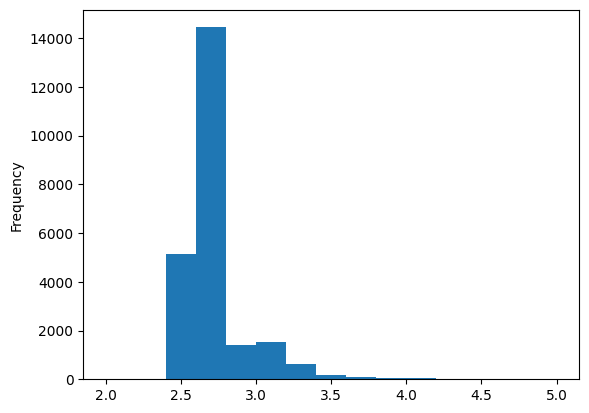

In [ ]:
df['ceiling_height'].plot(y = 'ceiling_height', kind = 'hist', bins = 15, range=(2,5))
plt.show()

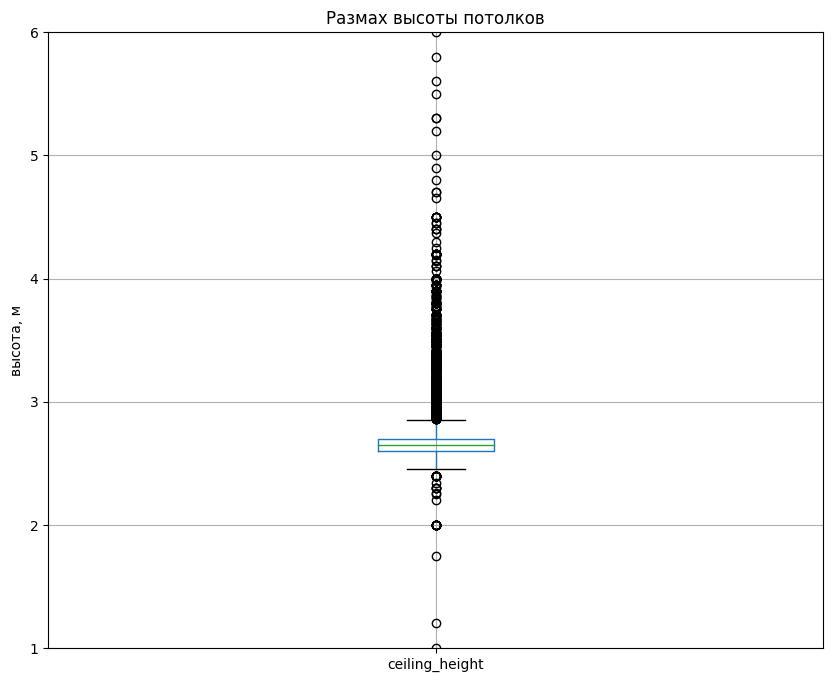

In [ ]:
# Построим диаграмму размаха высоты потолков
df.boxplot(column='ceiling_height', figsize=(10, 8))
plt.title('Размах высоты потолков')
plt.ylim(1, 6)
plt.ylabel('высота, м')
plt.show()

Из графика видно, значения менее 2,5м и более 2,8 метров - выбросы.

In [ ]:
# Оставим строки с высотой потолков от 2,3 до 5 метров
df = df.query('2.3 <= ceiling_height <= 5', engine='python')

In [ ]:
# Оставим строки с этажами <= 35 так как самый высокий жк Князь Александр Невский 35 этажей
df = df.query('floors_total <= 35 or floors_total.isna()', engine='python')

In [ ]:
df['floors_total'].max()

35.0

**Сделали предобработку данных, а именно**:

Изменили типы данных,
обработали явные и неявные дубликаты,
также обработали пропуски.

# Произведем расчет данных и добавим их в таблицу для дальнейшего исследования

Далее:

1.   Рассчитаем цену за квадратный метр
2.   День недели публикации
3.   Месяц публикации
4.   Год публикации
5.   Тип этажа (первый, последний, другой)
6.   Расстояние до центра города в километрах



In [ ]:
df.head(2)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0


In [ ]:
df['price_one_square_meter'] = (df.last_price / df.total_area).round(2)

In [ ]:
df.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37


In [ ]:
df['exposition_weekday'] = df['first_day_exposition'].dt.weekday

In [ ]:
df['exposition_month'] = df['first_day_exposition'].dt.month


In [ ]:
df['exposition_year'] = df['first_day_exposition'].dt.year

In [ ]:
df.head(1)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019


Напишем функцию для определения типа этажа

In [ ]:
def type_floor(row):
  floor = row['floor']
  floors_total = row['floors_total']
  if floor == 1:
    return 'Первый'
  elif floor == floors_total:
    return 'Последний'
  else:
    return 'Другой'

In [ ]:
df['floor_category'] = df.apply(type_floor, axis=1)

In [ ]:
df['cityCenters_nearest_km'] = (df['cityCenters_nearest'] / 1000).round()

In [ ]:
df.sample(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square_meter,exposition_weekday,exposition_month,exposition_year,floor_category,cityCenters_nearest_km
2460,15,7500000,78.0,2018-09-19,3,3.00,3.0,50.0,2,False,False,False,9.0,0,Пушкин,15298.0,27451.0,2.0,394.0,3.0,279.0,166.0,96153.85,2,9,2018,Другой,27.0
20838,5,4149000,55.4,2017-12-20,3,2.75,23.0,NaN,3,False,False,False,NaN,0,Санкт-Петербург,26726.0,8880.0,0.0,NaN,1.0,624.0,54.0,74891.70,2,12,2017,Другой,9.0
107,1,11000000,101.0,2016-04-13,4,3.00,3.0,73.0,3,False,False,False,9.0,1,Павловск,20746.0,32900.0,3.0,127.0,3.0,405.0,122.0,108910.89,2,4,2016,Последний,33.0


Добавили необходимые столбцы и произвели расчеты по ним

# Исследовательский анализ данных